In [28]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
plt.rc('text',usetex=True)
plt.rc('font',family='serif')

In [29]:
mdnRna = np.loadtxt('../mdnRnA.txt', delimiter=',')

In [33]:
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')
dates[-1]

Timestamp('2019-07-21 00:00:00', freq='W-SUN')

In [31]:
series = pd.Series(data=mdnRnA, index=dates)
print(series.head())

2013-07-07     90.0
2013-07-14     79.0
2013-07-21     99.0
2013-07-28    117.0
2013-08-04     99.0
Freq: W-SUN, dtype: float64


Text(0.5, 1.0, 'Weekly fitting at LSC - Hall A')

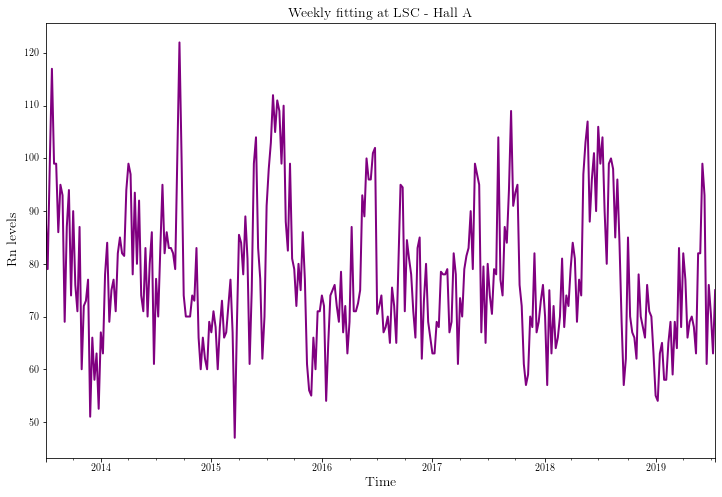

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.figure(1)
series.plot(linestyle='-', lw=2, color='purple')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Rn levels', fontsize=14)
plt.title('Weekly fitting at LSC - Hall A', fontsize=14)

# STL Decomposition

In [14]:
decomp = seasonal_decompose(series, model='multiplicative')

$Y = S\cdot T \cdot R$

In [15]:
observed = decomp.observed
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

arr_plts = [observed, trend, seasonal, residual]
arr_str = ['Observed', 'Trend', 'Seasonal', 'Residual']

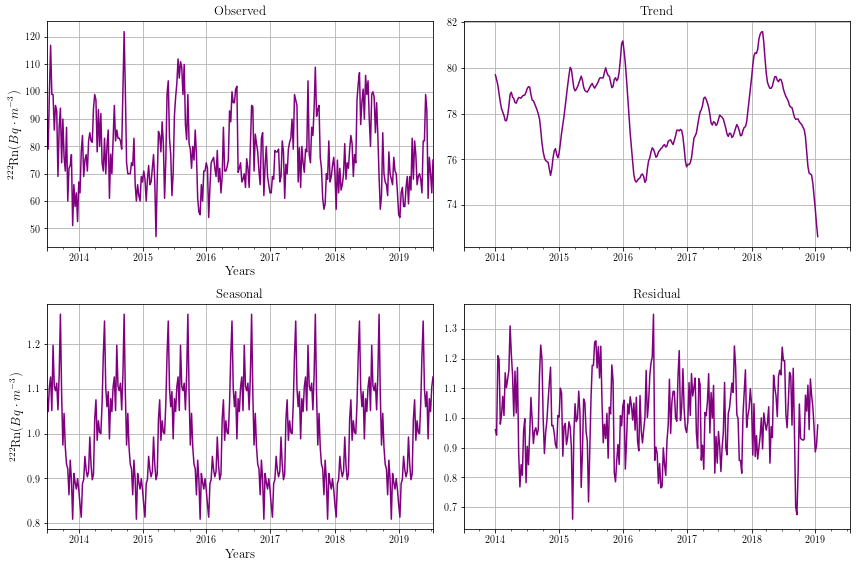

In [16]:
plt.figure(2, figsize=(12, 8))

for i in range(len(arr_plts)):
    ax = plt.subplot(2, 2, i+1)
    arr_plts[i].plot(lw=1.5, color='purple')
    plt.title('{}'.format(arr_str[i]), fontsize=13)
    plt.grid(True)
    if i == 0 or i == 2:
        plt.ylabel('$^{222}$Rn($Bq \cdot m^{-3}$)', fontsize=13)
        plt.xlabel('Years', fontsize=13)
    plt.tight_layout()
plt.savefig('./Rn_Seasonal_Decomposition.eps', bbox_inches='tight')

# Autocorrelation

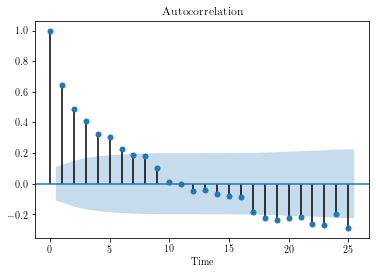

In [17]:
plot_acf(series)
plt.xlabel('Time')
plt.show()

Text(0, 0.5, 'Autocorrelation')

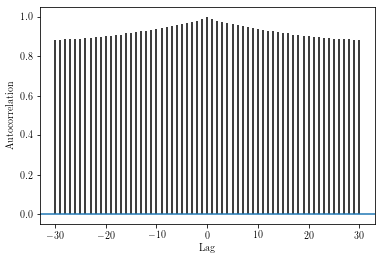

In [18]:
plt.acorr(mdnRnA, maxlags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In [19]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / np.max(result)

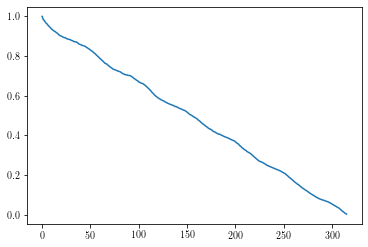

In [20]:
ac = autocorr(mdnRnA)
plt.plot(ac)

# Fast Fourier Transform (FFT)

In [21]:
from scipy import fftpack

In [22]:
FFT = np.abs(fftpack.fft(mdnRnA))[1:] # Drop the first value that explodes
freqs = fftpack.fftfreq(len(mdnRnA), d=1)[1:]
# Positive freqs
i = (freqs >= 0)
freqs = freqs[i]
FFT = FFT[i]

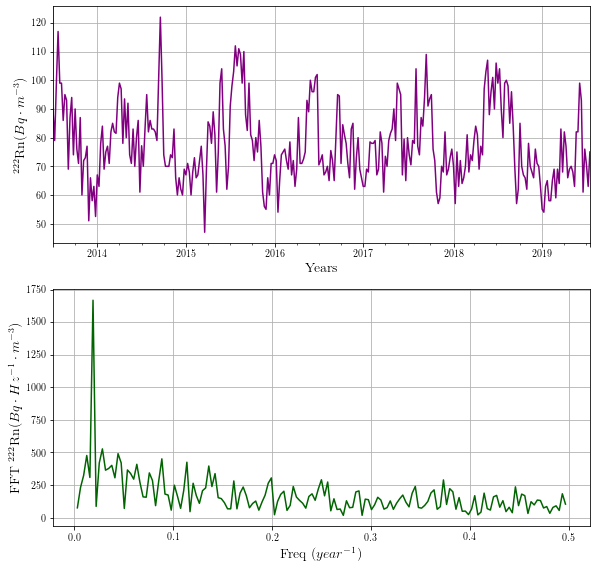

In [23]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(2, 2, 1)
observed.plot(color='purple', lw=1.5)
plt.xlabel('Years', fontsize=14)
plt.ylabel('$^{222}$Rn($Bq \cdot m^{-3}$)', fontsize=14)
plt.grid(True)

ax = plt.subplot(2, 2, 3)
plt.plot(freqs, FFT, color='darkgreen', lw=1.5)
plt.xlabel('Freq $(year^{-1})$', fontsize=14)
plt.ylabel('FFT $^{222}$Rn($Bq \cdot Hz^{-1} \cdot m^{-3}$)', fontsize=14)
#plt.xlim([1, 10])
#plt.ylim([-10, 2000])
plt.grid(True)

plt.tight_layout()
plt.savefig('./Rn_FFT_zoom.eps', bbox_inches='tight')

In [24]:
j = (FFT == np.max(FFT))
print("The most relevant period in the time series is: ", round(1/freqs[j][0],2), "weeks")

The most relevant period in the time series is:  52.67 weeks


# Saving the results

In [25]:
np.savetxt('fft(freq).txt', (freqs, FFT), delimiter=',')

In [26]:
fft2 = np.loadtxt('fft(freq).txt', delimiter=',')

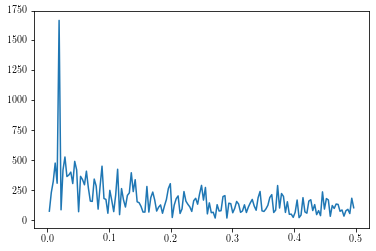

In [27]:
plt.plot(fft2[0], fft2[1])